# Applying Solution to Full Streets Data



In [1]:
import networkx as nx
import geopandas as gpd
import momepy
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import osmnx as ox
import shapely

c:\Users\Sneez\Desktop\Snowplowing\Snowplow-Routing-Code\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Step 1: Read and pre-process data

In [2]:
# Read the shapefile
shapefile_path = 'C:/Users/Sneez/Desktop/Snowplowing/Data+Info/GIS Data/OSMWithData.gpkg'
street_gdf = gpd.read_file(shapefile_path)
street_gdf

name  geom_Lengt Jurisdicti   Shape__Len  LengthMile  \
0      University Avenue    0.000117      State  1889.211956    0.357805   
1        Allen Boulevard    0.000319     County  2004.510057    0.379642   
2         Century Avenue    0.000082     County   383.443697    0.072622   
3           Amherst Road    0.001708       City   878.128296    0.166312   
4         Century Avenue    0.002431     County   383.443697    0.072622   
...                  ...         ...        ...          ...         ...   
1936      Evergreen Road    0.008853       City  1095.668337    0.207513   
1937        Airport Road    0.000841       City   894.248645    0.169365   
1938        Airport Road    0.002381       City   894.248645    0.169365   
1939  Pleasant View Road    0.000151       City    85.208730    0.016138   
1940        Airport Road    0.002452       City   894.248645    0.169365   

      Depth_in  With_EE_ft AverageSpe          fullStreet          StreetSegm  \
0          0.0        48.0       None   University Avenue   University Ave_01   
1          5.5        54.0       None     Allen Boulevard        Allen Blvd_1   
2          0.0         0.0       None      Century Avenue      Century Ave_01   
3          4.0        36.0       None        Amherst Road        Amherst Rd_1   
4          0.0         0.0       None      Century Avenue      Century Ave_01   
...        ...         ...        ...                 ...                 ...   
1936       5.0        32.0       None      Evergreen Road      Evergreen Rd_1   
1937       4.0        52.0       None        Airport Road        Airport Rd_1   
1938       4.0        52.0       None        Airport Road        Airport Rd_1   
1939       3.0        23.0       None  Pleasant View Road  Pleasant View Rd_1   
1940       4.0        52.0       None        Airport Road        Airport Rd_1   

      ... PASER_Ra_3  CreationDa  PASER_Ra_4           Creator  PASER_Ra_5  \
0     ...       -1.0  2022-04-27        -1.0  skiley_Middleton        -1.0   
1     ...       -1.0  2022-04-27        -1.0  skiley_Middleton        -1.0   
2     ...       -1.0  2022-04-27        -1.0  skiley_Middleton        -1.0   
3     ...        3.0  2022-04-27         3.0  skiley_Middleton         3.0   
4     ...       -1.0  2022-04-27        -1.0  skiley_Middleton        -1.0   
...   ...        ...         ...         ...               ...         ...   
1936  ...        9.0  2022-04-27         7.0  skiley_Middleton         7.0   
1937  ...        8.0  2022-04-27         8.0  skiley_Middleton         8.0   
1938  ...        8.0  2022-04-27         8.0  skiley_Middleton         8.0   
1939  ...        5.0  2022-04-27         5.0  skiley_Middleton         7.0   
1940  ...        8.0  2022-04-27         8.0  skiley_Middleton         8.0   

        EditDate  PASER_Ra_6            Editor PASER_Ra_7  \
0     2024-01-05        -1.0  skiley_Middleton        0.0   
1     2024-01-05        -1.0  skiley_Middleton        0.0   
2     2024-01-05        -1.0  skiley_Middleton        0.0   
3     2024-01-05        10.0  skiley_Middleton        9.0   
4     2024-01-05        -1.0  skiley_Middleton        0.0   
...          ...         ...               ...        ...   
1936  2024-01-05         7.0  skiley_Middleton        7.0   
1937  2024-01-05         8.0  skiley_Middleton        8.0   
1938  2024-01-05         8.0  skiley_Middleton        8.0   
1939  2024-01-05         7.0  skiley_Middleton        7.0   
1940  2024-01-05         8.0  skiley_Middleton        8.0   

                                               geometry  
0     MULTILINESTRING ((-89.48609 43.08982, -89.4861...  
1     MULTILINESTRING ((-89.48609 43.08982, -89.4860...  
2     MULTILINESTRING ((-89.49026 43.10412, -89.4901...  
3     MULTILINESTRING ((-89.49026 43.10412, -89.4902...  
4     MULTILINESTRING ((-89.49026 43.10412, -89.4905...  
...                                                 ...  
1936  MULTILINESTRING ((-89.54120 43.11113, -89.5412...  


In [3]:
street_gdf['abvPostTyp'].unique()

array(['Ave', 'Blvd', 'Rd', None, 'Way', 'Ln', 'Dr', 'Trl', 'Plz', 'St',
       'Ct', 'Cir', 'Pl', 'Pass', 'Loop', 'Ter', 'Pkwy', 'Run', 'Walk',
       'Grn', 'Hl'], dtype=object)

In [4]:
street_gdf.columns

Index(['name', 'geom_Lengt', 'Jurisdicti', 'Shape__Len', 'LengthMile',
       'Depth_in', 'With_EE_ft', 'AverageSpe', 'fullStreet', 'StreetSegm',
       'FromName', 'ToName', 'Shape__Len_2', 'LengthMile_2', 'Depth_in_2',
       'With_EE_ft_2', 'ROW_ft', 'PASER_Rati', 'RdCode', 'Jurisdicti_2',
       'YearComple', 'ProjectNum', 'ProjectNam', 'SurfaceMat', 'AADT',
       'ADTMonthYe', 'AverageSpe_2', 'YearSpeedC', 'CG_Type_Ev', 'CG_Type_Od',
       'CG_Width_f', 'CG_Width_1', 'T_Width_ft', 'T_Width__1', 'Sidewalk_L',
       'Sidewalk_W', 'StreetSe_1', 'abvStreetN', 'abvPreDire', 'abvPreType',
       'abvPostTyp', 'abvPostDir', 'Maintained', 'TrafficDir', 'SpeedDir',
       'Class_MPO_', 'Culdesac_R', 'Type', 'BaseMateri', 'DeveloperN',
       'preType', 'BaseName', 'postType', 'postDirect', 'Circle_YN',
       'PASER_Ra_1', 'PASER_Ra_2', 'GlobalID', 'PASER_Ra_3', 'CreationDa',
       'PASER_Ra_4', 'Creator', 'PASER_Ra_5', 'EditDate', 'PASER_Ra_6',
       'Editor', 'PASER_Ra_7', 'geometry

Attributes I want: with_ee_ft, Juristicti, abvPreType, Maintained

<Axes: >

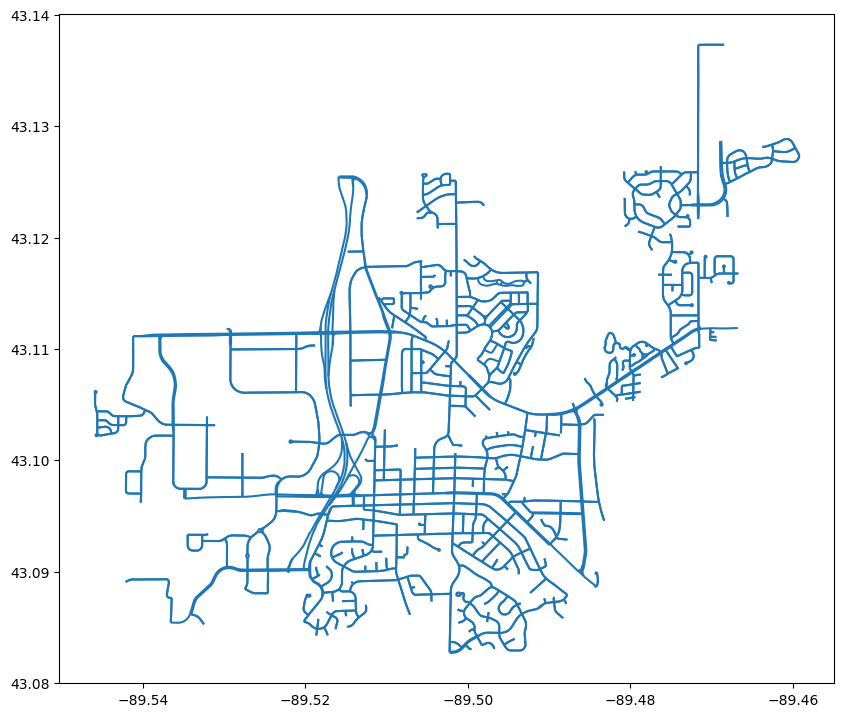

In [5]:
street_gdf.plot(figsize=(10,10))

Convert to networkx graph

In [6]:
G_primal = momepy.gdf_to_nx(street_gdf.explode(), approach='primal', directed=True)


C:\Users\Sneez\AppData\Local\Temp\ipykernel_25512\3200009096.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  G_primal = momepy.gdf_to_nx(street_gdf.explode(), approach='primal', directed=True)
c:\Users\Sneez\Desktop\Snowplowing\Snowplow-Routing-Code\.venv\Lib\site-packages\momepy\utils.py:252: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length


## Get OSM Data for attributes like road type and travel time

In [7]:
G_osm = ox.graph_from_place('Middleton, Wisconsin', network_type='drive')
G_osm = ox.add_edge_speeds(G_osm)
G_osm = ox.add_edge_travel_times(G_osm)

In [8]:
nodes, edges = ox.graph_to_gdfs(G_osm) # better than momepy b/c fills in missing geometry attributes
print(edges["highway"].unique())
edges

['primary' 'secondary' 'residential' 'motorway_link' 'tertiary' 'motorway'
 'tertiary_link' 'secondary_link' 'unclassified' 'primary_link']


osmid  oneway lanes  \
u           v           key                                                    
30052861    454667326   0                            871134221    True     2   
            2573782092  0               [700703012, 871134222]    True     2   
30053475    3426163949  0                            178715043   False     4   
            53460137    0                              6654382   False   NaN   
            568267435   0                            178715043   False     4   
...                                                        ...     ...   ...   
11367791760 53712609    0    [712687115, 712669826, 712687114]   False   NaN   
11367791761 11367791760 0                             28616743   False   NaN   
            1881948104  0                              4719323    True   NaN   
11367791768 1881948104  0                             46847063    True   NaN   
            11367791761 0                            129265710    True   NaN   

                                ref                name      highway maxspeed  \
u           v           key                                                     
30052861    454667326   0    CTH MS   University Avenue      primary   35 mph   
            2573782092  0       NaN     Allen Boulevard    secondary      NaN   
30053475    3426163949  0     CTH M      Century Avenue    secondary   30 mph   
            53460137    0       NaN        Amherst Road  residential      NaN   
            568267435   0     CTH M      Century Avenue    secondary   30 mph   
...                             ...                 ...          ...      ...   
11367791760 53712609    0       NaN      Evergreen Road  residential      NaN   
11367791761 11367791760 0       NaN        Airport Road     tertiary      NaN   
            1881948104  0       NaN        Airport Road     tertiary      NaN   
11367791768 1881948104  0       NaN  Pleasant View Road     tertiary      NaN   
            11367791761 0       NaN        Airport Road     tertiary      NaN   

                            reversed   length  speed_kph  travel_time  \
u           v           key                                             
30052861    454667326   0      False   10.805       56.3          0.7   
            2573782092  0      False   32.204       52.6          2.2   
30053475    3426163949  0      False    6.678       48.3          0.5   
            53460137    0       True  189.262       42.4         16.1   
            568267435   0       True  198.241       48.3         14.8   
...                              ...      ...        ...          ...   
11367791760 53712609    0       True  893.599       42.4         75.9   
11367791761 11367791760 0      False   68.248       43.2          5.7   
            1881948104  0      False  193.357       43.2         16.1   
11367791768 1881948104  0      False   15.998       43.2          1.3   
            11367791761 0      False  199.416       43.2         16.6   

                                                                      geometry  \
u           v           key                                                      
30052861    454667326   0    LINESTRING (-89.48609 43.08982, -89.48619 43.0...   
            2573782092  0    LINESTRING (-89.48609 43.08982, -89.48604 43.0...   
30053475    3426163949  0    LINESTRING (-89.49026 43.10412, -89.49018 43.1...   
            53460137    0    LINESTRING (-89.49026 43.10412, -89.49026 43.1...   
            568267435   0    LINESTRING (-89.49026 43.10412, -89.49056 43.1...   
...                                                                        ...   
11367791760 53712609    0    LINESTRING (-89.54120 43.11113, -89.54120 43.1...   
11367791761 11367791760 0    LINESTRING (-89.54036 43.11115, -89.54120 43.1...   
            1881948104  0    LINESTRING (-89.54036 43.11115, -89.54012 43.1...   
11367791768 1881948104  0    LINESTRING (-89.53792 43.11129, -89.53798 43.1...   
            11367791761 0   

Need to update passes, salt, and priority based on guidance from Eric

In [9]:
priority_keys = {"motorway_link":1, "tertiary_link":1, "secondary_link":1, "primary_link":1, "unclassified":1, "residential":2, "tertiary":3, "secondary":4, "primary":5, "motorway":6}
passes_keys = {"motorway_link":1, "tertiary_link":1, "secondary_link":1, "primary_link":1, "unclassified":1, "residential":2, "tertiary":3, "secondary":4, "primary":5, "motorway":6}
salt_keys = {"motorway_link":1, "tertiary_link":1, "secondary_link":1, "primary_link":1, "unclassified":1, "residential":2, "tertiary":3, "secondary":4, "primary":5, "motorway":6}

priorities = np.empty(len(edges))
passes = np.empty(len(edges))
salt = np.empty(len(edges))

# go through each edge and update dictionary
for row in range(len(edges)):
    highway_type = edges.iloc[row]['highway']
    if street_gdf.iloc[row]['Jurisdicti'] == "City":
        priorities[row] = priority_keys[highway_type]
        passes[row] = passes_keys[highway_type]
        salt[row] = passes_keys[highway_type]
    else:
        priorities[row] = 0
        passes[row] = 0
        salt[row] = 0


edges['priority'] = priorities
edges['passes_rem'] = passes
edges['salt_per'] = salt


Add in attributes from geodataframe

In [10]:
edges['jurisdiction'] = np.array(street_gdf['Jurisdicti'])
edges['width'] = np.array(street_gdf['With_EE_ft'])
edges['roadtype'] = np.array(street_gdf['abvPostTyp'])
edges['maintainer'] = np.array(street_gdf['Maintained'])
edges['deadheading_passes'] = np.zeros(len(edges))

edges

osmid  oneway lanes  \
u           v           key                                                    
30052861    454667326   0                            871134221    True     2   
            2573782092  0               [700703012, 871134222]    True     2   
30053475    3426163949  0                            178715043   False     4   
            53460137    0                              6654382   False   NaN   
            568267435   0                            178715043   False     4   
...                                                        ...     ...   ...   
11367791760 53712609    0    [712687115, 712669826, 712687114]   False   NaN   
11367791761 11367791760 0                             28616743   False   NaN   
            1881948104  0                              4719323    True   NaN   
11367791768 1881948104  0                             46847063    True   NaN   
            11367791761 0                            129265710    True   NaN   

                                ref                name      highway maxspeed  \
u           v           key                                                     
30052861    454667326   0    CTH MS   University Avenue      primary   35 mph   
            2573782092  0       NaN     Allen Boulevard    secondary      NaN   
30053475    3426163949  0     CTH M      Century Avenue    secondary   30 mph   
            53460137    0       NaN        Amherst Road  residential      NaN   
            568267435   0     CTH M      Century Avenue    secondary   30 mph   
...                             ...                 ...          ...      ...   
11367791760 53712609    0       NaN      Evergreen Road  residential      NaN   
11367791761 11367791760 0       NaN        Airport Road     tertiary      NaN   
            1881948104  0       NaN        Airport Road     tertiary      NaN   
11367791768 1881948104  0       NaN  Pleasant View Road     tertiary      NaN   
            11367791761 0       NaN        Airport Road     tertiary      NaN   

                            reversed   length  speed_kph  ...  junction  \
u           v           key                               ...             
30052861    454667326   0      False   10.805       56.3  ...       NaN   
            2573782092  0      False   32.204       52.6  ...       NaN   
30053475    3426163949  0      False    6.678       48.3  ...       NaN   
            53460137    0       True  189.262       42.4  ...       NaN   
            568267435   0       True  198.241       48.3  ...       NaN   
...                              ...      ...        ...  ...       ...   
11367791760 53712609    0       True  893.599       42.4  ...       NaN   
11367791761 11367791760 0      False   68.248       43.2  ...       NaN   
            1881948104  0      False  193.357       43.2  ...       NaN   
11367791768 1881948104  0      False   15.998       43.2  ...       NaN   
            11367791761 0      False  199.416       43.2  ...       NaN   

                            access priority passes_rem salt_per  jurisdiction  \
u           v           key                                                     
30052861    454667326   0      NaN      5.0        0.0      0.0         State   
            2573782092  0      NaN      4.0        0.0      0.0        County   
30053475    3426163949  0      NaN      4.0        0.0      0.0        County   
            53460137    0      NaN      2.0        2.0      2.0          City   
            568267435   0      NaN      4.0        0.0      0.0        County   
...                            ...      ...        ...      ...           ...   
11367791760 53712609    0      NaN      2.0        2.0      2.0          City   
11367791761 11367791760 0      NaN      3.0        3.0      3.0          City   
            1881948104  0      NaN      3.0        3.0      3.0          City   
11367791768 1881948104  0      NaN      3.0        3.0      3.0          City   
            11

In [11]:
G = ox.graph_from_gdfs(nodes, edges)

print(G)

MultiDiGraph with 813 nodes and 1941 edges


Convert to a strongly connected graph

In [12]:
G_strong = G.copy()
scc = list(nx.strongly_connected_components(G)) # strongly connected components
scc.remove(max(scc, key=len))

for i in scc:
    for j in i:
        G_strong.remove_node(j) # remove all but the strongest connected component from G
print(nx.is_strongly_connected(G_strong))

True


In [13]:
print(G_strong)
print(nx.DiGraph(G_strong))

MultiDiGraph with 793 nodes and 1907 edges
DiGraph with 793 nodes and 1889 edges


Not quite a normal digraph

Plot

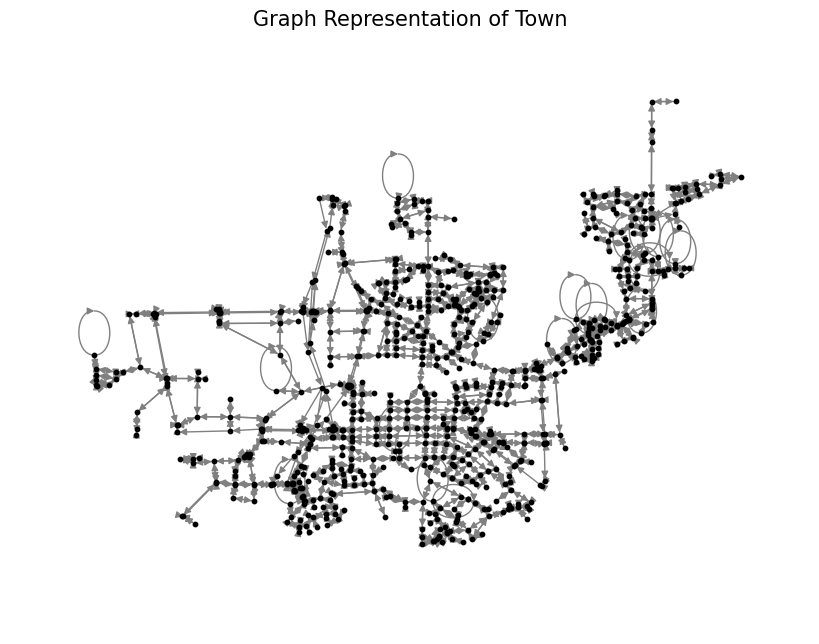

In [14]:
node_positions = {node[0]: (node[1]['x'], node[1]['y']) for node in G_strong.nodes(data=True)}
plt.figure(figsize=(8, 6))
nx.draw(G_strong, pos=node_positions, node_size=10, node_color='black', edge_color='gray', with_labels=False)
plt.title('Graph Representation of Town', size=15)
plt.show()

Add weighted degree and deadheading passes

In [15]:
def config_graph_node_attributes(G):
    for node in G.nodes:
        weight_deg = 0
        for edge in G.edges([node], data=True):
            weight_deg += edge[2]['passes_rem']*edge[2]['priority']
        G.nodes[node]['weighted_degree'] = weight_deg


config_graph_node_attributes(G_strong)
# print result
for node in G_strong.nodes(data=True):
    print(node)

(454667326, {'y': 43.0898862, 'x': -89.486188, 'highway': 'traffic_signals', 'street_count': 4, 'weighted_degree': 0.0})
(30053475, {'y': 43.1041156, 'x': -89.4902579, 'street_count': 3, 'weighted_degree': 4.0})
(3426163949, {'y': 43.1041179, 'x': -89.4901757, 'street_count': 3, 'weighted_degree': 0.0})
(53460137, {'y': 43.1024203, 'x': -89.4904035, 'street_count': 4, 'weighted_degree': 16.0})
(568267435, {'y': 43.1042716, 'x': -89.4926768, 'highway': 'traffic_signals', 'street_count': 3, 'weighted_degree': 9.0})
(38408843, {'y': 43.0967641, 'x': -89.5140532, 'highway': 'traffic_signals', 'street_count': 4, 'weighted_degree': 0.0})
(441028477, {'y': 43.096888, 'x': -89.5140567, 'highway': 'traffic_signals', 'street_count': 4, 'weighted_degree': 0.0})
(53475938, {'y': 43.0968342, 'x': -89.5128708, 'street_count': 3, 'weighted_degree': 0.0})
(38408844, {'y': 43.0968493, 'x': -89.5177331, 'street_count': 3, 'weighted_degree': 0.0})
(441028475, {'y': 43.0968466, 'x': -89.5181202, 'highway'

In [16]:
def print_graph_attributes(G, nodes=True, edges=True):
    if nodes:
        for node in G.nodes(data=True):
            print(node)
    if edges:
        for edge in G.edges(data=True, keys=True):
            print(edge)

## Creating the Dual Graph
#### Determining the Angle Between Two Linestrings

Determining the angle between two linestrings. There are two approaches: endpoints vs. closest coords. Closest coords is the best approach, but momepy uses endpoints

In [17]:
from math import atan2
from math import pi

def angle(a, b, c):
    '''
    Calculates the signed angle in degrees between vectors ab and bc. Negative if bc is clockwise of ab.
    '''
    v = (b[0]-a[0], b[1]-a[1])
    w = (c[0]-b[0], c[1]-b[1])

    dot = v[0]*w[0] + v[1]*w[1]     # Dot product between [x1, y1] and [x2, y2]
    det = v[0]*w[1] - v[1]*w[0]      # Determinant
    angle = atan2(det, dot)  # atan2(y, x) or atan2(sin, cos)

    return angle*180/pi

In [18]:
def turn_direction(angle):
    '''
    Returns the direction of a turn given an angle. Clockwise (right turn) angles are negative, counterclockwise are positive
    '''
    if angle < 15 and angle > -15:
        return "straight"
    elif angle >= -90 and angle <= -15:
        return "right"
    elif angle >= -135 and angle < -90:
        return "sharp right"
    elif angle <= 90 and angle >= 15:
        return "left"
    elif angle <= 135 and angle > 90:
        return "sharp left"
    else:
        return "u-turn"

Note that plotting scales are disconfigured

-88.5576471686895
right


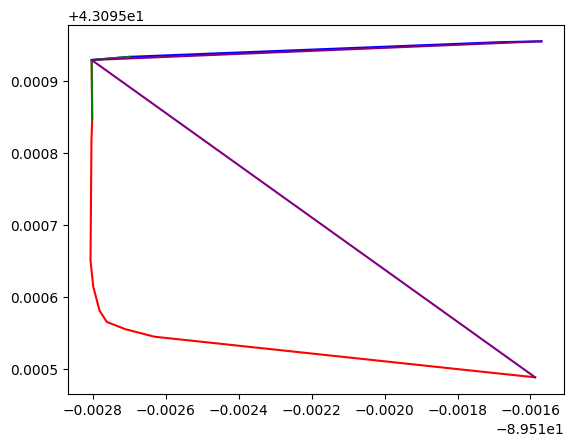

In [19]:
from_node = (53413399, 53441514)
to_node = (53441514, 53441511)
# get the edge associated with the two indices in from_node
testL1 = G.edges[from_node[0], from_node[1], 0]['geometry']
testL2 = G.edges[to_node[0], to_node[1], 0]['geometry']

p0 = testL1.coords[-2]
p1 = testL1.coords[-1]

p2 = testL2.coords[0]
p3 = testL2.coords[1]

p0_endpoint = testL1.coords[0]
p3_endpoint = testL2.coords[-1]

plt.plot(*testL1.xy, color='red')
plt.plot(*testL2.xy, color='blue')
plt.plot(*shapely.geometry.LineString([p0, p1, p2, p3]).xy, color='green') # green is much better
plt.plot(*shapely.geometry.LineString([p0_endpoint, p1, p2, p3_endpoint]).xy, color='purple')

points = [p0, p1, p2, p3]

shared = [x for x in points if points.count(x) > 1]
remaining = [e for e in points if e not in [shared[0]]]
angle_value = angle(remaining[0], shared[0], remaining[1])
print(angle_value)
print(turn_direction(angle_value))

As we can see, the green is a lot better approximation of the angle.

Furthermore, this method allows us to compute angles between self-loops, whereas Momepy fails here. However, this next example is really a u-turn in a cul-de-sac. Therefore, for self-loops, we set the angle to 180 degrees by hand

{0: {'osmid': 6763942, 'oneway': False, 'name': 'Henry Court', 'highway': 'residential', 'reversed': False, 'length': 46.884, 'speed_kph': 42.4, 'travel_time': 4.0, 'geometry': <LINESTRING (-89.505 43.094, -89.506 43.094, -89.506 43.094)>, 'priority': 2.0, 'passes_rem': 2.0, 'salt_per': 2.0, 'jurisdiction': 'City', 'width': 28.0, 'roadtype': 'Ct', 'maintainer': 'CITY OF MIDDLETON', 'deadheading_passes': 0.0}}
{0: {'osmid': 405907623, 'oneway': True, 'name': 'Henry Court', 'highway': 'residential', 'reversed': False, 'length': 48.30500000000001, 'speed_kph': 42.4, 'travel_time': 4.1, 'geometry': <LINESTRING (-89.506 43.094, -89.506 43.094, -89.506 43.094, -89.506 43.094,...>, 'priority': 2.0, 'passes_rem': 2.0, 'salt_per': 2.0, 'jurisdiction': 'City', 'width': 28.0, 'roadtype': 'Ct', 'maintainer': 'CITY OF MIDDLETON', 'deadheading_passes': 0.0}}
(43.094183, -89.5057213) 
 (43.0942089, -89.5058599) 
 (43.0942344, -89.5058469)
array('d', [-89.505287, -89.5057213, -89.5058599]) array('d', 

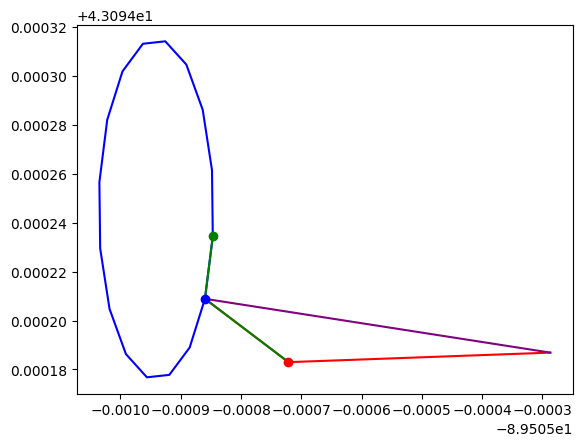

In [20]:
from_node = (53664849, 53664854)
to_node = (53664854, 53664854)
print(G[from_node[0]][from_node[1]]) #henry crt to henry st
print(G[to_node[0]][to_node[1]]) # henry ctr to henry crt (self loop) should be u-turns

# get the edge associated with the two indices in from_node
testL1 = G.edges[from_node[0], from_node[1], 0]['geometry']
testL2 = G.edges[to_node[0], to_node[1], 0]['geometry']

p0 = testL1.coords[-2]
p1 = testL1.coords[-1]

p2 = testL2.coords[0]
p3 = testL2.coords[1]

print(p0[::-1], "\n", p1[::-1], "\n", p3[::-1])
p0_endpoint = testL1.coords[0]
p3_endpoint = testL2.coords[-1]
print(*testL1.xy)
plt.plot(*testL1.xy, color='red')
plt.plot(*testL2.xy, color='blue')
plt.plot(*shapely.geometry.LineString([p0, p1, p2, p3]).xy, color='green') # green is much better
plt.plot(*shapely.geometry.LineString([p0_endpoint, p1, p2, p3_endpoint]).xy, color='purple')

points = [p0, p1, p2, p3]

shared = [x for x in points if points.count(x) > 1]
remaining = [e for e in points if e not in [shared[0]]]
plt.plot(*remaining[0], 'ro')
plt.plot(*shared[0], 'bo')
plt.plot(*remaining[1], 'go')
print(remaining[0], shared[0], remaining[1])
angle_value = angle(remaining[0], shared[0], remaining[1])
print(angle_value)
print(turn_direction(angle_value))

The graph is distorted from reality, but the turn is in actuality sharp right.

In [21]:
def cost_of_dual_node(n1, n2, angle):
    """
    Calculate the weighted degree of a node in a graph. Helper for ``create_dual``.
    """
    weight = n1[3]['travel_time'] + n2[3]['travel_time']
    # add the turn penalty cost
    turn_penalty = {"straight": 0, "right": 1, "left": 2, "sharp right": 2, "sharp left": 3, "u-turn": 4}
    
    weight += turn_penalty[turn_direction(angle)]
    return weight

In [22]:
def create_dual(G: nx.MultiDiGraph):
    L = nx.MultiDiGraph()

    # Create a graph specific edge function.
    for from_node in G.edges(keys=True, data=True):
        # from_node is: (u,v,key, attrb)
        L.add_node(from_node[:3])
        for to_node in G.edges(from_node[1], keys=True, data=True):
            L.add_edge(from_node[:3], to_node[:3])
            # self loop means a u-turn is needed
            if(to_node[0] == to_node[1]):
                L.edges[from_node[:3], to_node[:3], 0]['angle'] = 180
                continue
                
            # add angles
            testL1 = from_node[3]['geometry']
            testL2 = to_node[3]['geometry']

            p0 = testL1.coords[-2]
            p1 = testL1.coords[-1]
            p2 = testL2.coords[0]
            p3 = testL2.coords[1]

            
            points = [p0, p1, p2, p3]
            shared = [x for x in points if points.count(x) > 1]
            remaining = [e for e in points if e not in [shared[0]]]
            angle_value = angle(remaining[0], shared[0], remaining[1])

            L.edges[from_node[:3], to_node[:3], 0]['weight'] = cost_of_dual_node(from_node, to_node, angle_value)

    # add source and target nodes
    for node in G:
        L.add_node(str(node) + "_source", weight=0)
    # add edges connecting source and targets to valid gateways
    for node in L.nodes():
        # skip the source nodes which are strings. The other nodes are tuples
        if (type(node) == str):
            continue
            
        # for a digraph, not a multigraph:
        # source -> first node
        # second node -> source
        L.add_edge(str(node[0]) + "_source", node, weight=0)
        # L.add_edge(str(node[1]) + "_source", node, weight=0) only for undirected

        # L.add_edge(node, str(node[0]) + "_source", weight=0) only for undirected
        L.add_edge(node, str(node[1]) + "_source", weight=0)

    return L

In [23]:
G_dual = create_dual(G_strong)
print(G_dual)
print_graph_attributes(G_dual, nodes=False)

"""
Testing
node1 = 38408843
node2 = 441028477
node3 = 53303114
node4 = 452225415

nx.dijkstra_path(G_dual, (node1, node2, 0), (node3, node4, 0))"""

MultiDiGraph with 2700 nodes and 9060 edges
((454667326, 471251970, 0), (471251970, 471252019, 0), 0, {'weight': 26.599999999999998})
((454667326, 471251970, 0), '471251970_source', 0, {'weight': 0})
((471251970, 471252019, 0), (471252019, 53624762, 0), 0, {'weight': 33.2})
((471251970, 471252019, 0), (471252019, 471252040, 0), 0, {'weight': 27.7})
((471251970, 471252019, 0), (471252019, 471252022, 0), 0, {'weight': 46.3})
((471251970, 471252019, 0), '471252019_source', 0, {'weight': 0})
((30053475, 3426163949, 0), (3426163949, 30053475, 0), 0, {'weight': 5.0})
((30053475, 3426163949, 0), (3426163949, 568267438, 0), 0, {'weight': 11.7})
((30053475, 3426163949, 0), '3426163949_source', 0, {'weight': 0})
((3426163949, 30053475, 0), (30053475, 3426163949, 0), 0, {'weight': 5.0})
((3426163949, 30053475, 0), (30053475, 53460137, 0), 0, {'weight': 18.6})
((3426163949, 30053475, 0), (30053475, 568267435, 0), 0, {'weight': 15.3})
((3426163949, 30053475, 0), '30053475_source', 0, {'weight': 0})

'\nTesting\nnode1 = 38408843\nnode2 = 441028477\nnode3 = 53303114\nnode4 = 452225415\n\nnx.dijkstra_path(G_dual, (node1, node2, 0), (node3, node4, 0))'

# Step 4: Route Construction Algorithm (RCA)

Variables:
| Variable | Definition 
|:--------:|:--------:|
|  RCL |  Restricted Candidate List |
|  $\alpha$   |  Threshold parameter. Value between 0 and 1  
|  C<sub>min   | Lowest incremental cost of a candidate element to be added to the partial solution    |
| C<sub>max | Highest incremental cost of a candidate element to be added to the partial solution|
| S_i | Amount of salt required to service road i |
|E| List of possible candidates that can be added to the partial solution
|No_Routes|Number of routes developed in the network



Overview:
1. If there is at least one required arc from the current node, then create a restricted candidate list based on the neighbors of the current node. Otherwise go to step 3
2. If RCL is empty, go to step 3. Otherwise choose a random arc from the RCL based on the threshold parameter and cost range
3. Go through the list of all required arcs and find the closest one.
4. Service that arc, subtracting one from the effective degree of the current node
5. Update the current node to the new node

## Defining a Class for the Routes

We want to keep track of certain attributes of each traversed edge for backtracking purposes. Let's create a class to manage all the variables

In [24]:
class RouteStep:
    """
    Represents a step in a route.

    Attributes:
        node1 (str): The starting node of the step.
        node2 (str): The ending node of the step.
        id (int): The id of the step (identifier for parallel edges)
        wasDeadheaded (bool): Indicates whether the step was a deadhead (empty) move.
        hadOptions (bool): Indicates whether the step had multiple options for routing. Could have gone a different direction
        saltval (int): Indicates the amount of salt the vehicle had before traversing the arc. Useful for checking validity of solution
    """
    def __init__(self, node1="", node2="", id=0, wasDeadheaded=False, hadOptions=False, saltval = 0):
        self.node1 = node1
        self.node2 = node2
        self.id = id
        self.wasDeadheaded = wasDeadheaded
        self.hadOptions = hadOptions
        self.saltval = saltval

    def __str__(self):
        return f"{self.node1} --> {self.node2}. ({self.id}) Deadhead: {self.wasDeadheaded}. Had options: {self.hadOptions}. Salt value: {self.saltval}"

    def __repr__(self):
        return str(self)


## Identifying Turn Directions at an Intersection - **No Modifications Required**

Methodology: Use coordinate system. Identify the three coordinates of the triangle (can be degenerate) that every turn makes. Potential for linear algebra: dot product of the two vectors, or change of basis?

Example: going from (2,1) to (0,1) to (-1,-1)

v = [-2, 0]
w = [-1, -2]

Create a function that computes the cost of traversing an arc

In [25]:
from math import atan2
from math import pi
def angle_vector(v, w):
    '''
    Computes the signed angle (in degrees) between two vectors v and w
    '''
    dot = v[0]*w[0] + v[1]*w[1]     # Dot product between [x1, y1] and [x2, y2]
    det = v[0]*w[1] - v[1]*w[0]      # Determinant
    angle = atan2(det, dot)  # atan2(y, x) or atan2(sin, cos)

    return angle*180/pi

In [26]:
def cost(G, prev, curr, nxt, k):
    '''
    Returns the cost of traversing an edge between two nodes. Based on distance and turn direction
    '''
    cost = G[curr][nxt][k]['travel_time']

    # without previous node, we can't factor turn direction
    if prev is None:
        return cost
    
    # with a previous node, we incorporate turning penalites
    turn_cost = {"straight": 0, "right": 1, "left": 2, "sharp right": 2, "sharp left": 3, "u-turn": 4}

    v_x = G.nodes[curr]['x']-G.nodes[prev]['x']
    v_y = G.nodes[curr]['y']-G.nodes[prev]['y']

    w_x = G.nodes[nxt]['x']-G.nodes[curr]['x']
    w_y = G.nodes[nxt]['y']-G.nodes[curr]['y']

    v = (v_x, v_y)
    w = (w_x, w_y)

    theta = angle_vector(v,w)
    cost += turn_cost[turn_direction(theta)]

    return cost

In [27]:
def needs_servicing(G, node1, node2, id):
    '''
    Returns whether or not the edge between two nodes requires servicing
    '''
    return G[node1][node2][id]['passes_rem'] > 0

## Identifying the Location of the Depot

Lat, long = 43.123172, -89.513456 (y, x)

In [ ]:
def find_depot():
    depX = -89.513456
    depY = 43.123172

    dist = lambda x,y : math.sqrt((x-depX)**2 + (y-depY)**2)

    minDist = math.inf
    minNode = None
    for node in G_strong.nodes(data=True):
        attr = node[1]
        distance = dist(attr['x'], attr['y'])
        if distance < minDist:
            minDist = distance
            minNode = node
    return minNode[0], minNode[1]

In [71]:
minNode, coords = find_depot()
print(minNode)
node_positions = {node[0]: (node[1]['x'], node[1]['y']) for node in G_strong.nodes(data=True)}
plt.figure(figsize=(8, 6))
nx.draw(G_strong, pos=node_positions, node_size=10, node_color='black', edge_color='gray', with_labels=False)
plt.title('Depot Labeled', size=15)
plt.plot(coords['x'], coords['y'], 'ro', label='Depot')
plt.show()


TypeError: cannot unpack non-iterable int object

### Start finding a route

Check if there are any required arcs remaining departing from the current node

Do we need to flip the arc ever? It's dangerous to do in a directed graph, and I don't think its necessary if all the nodes are being kept track of properly

In [61]:
def visit_arc(G: nx.Graph, curr: str, arc: tuple, route: list, options: bool, undirected=False):
    global curr_salt
    '''
    Visits an arc and updates the route and cost. Returns the new node that the arc is on
    
    Parameters:
        G (networkx.Graph): The graph representing the network
        curr (str): the current node
        arc (tuple): The arc to be visited
        route (list): The partial route taken so far (default: partial_route)
        undirected (bool): Flag indicating if the graph is undirected (default: True)
    
    Returns:
        str: The new node that the arc is on
    '''

    # identify the direction of traversal. fixed by def of digraph
    from_node = arc[0] # if arc[0] == curr else arc[1]
    to_node = arc[1] # if from_node == arc[0] else arc[0]
    id = arc[2]
    # initialize routstep object
    route_step = RouteStep(from_node, to_node, id, hadOptions=options, saltval=curr_salt)

    # not deadheading. So we service the arc and update the effective degree of the relevant node
    # need a check to see if we can actually service the arc given the amount of salt we have left.
    salt_required = G[from_node][to_node][id]['salt_per']

    # needs servicing and we can service it. Update weighted and effective degree
    if needs_servicing(G, from_node, to_node, id) and curr_salt >= salt_required:
        G.nodes[from_node]['weighted_degree'] -= G[from_node][to_node][id]['priority']
        if (undirected):
            G.nodes[to_node]['weighted_degree'] -= G[from_node][to_node][id]['priority']

        curr_salt -= salt_required

        G[from_node][to_node][id]['passes_rem'] -= 1 # mark that we traversed this arc
        route_step.wasDeadheaded = False
    else:
        G[from_node][to_node][id]['deadheading_passes'] += 1
        route_step.wasDeadheaded = True

    route.append(route_step)
    return to_node

In [62]:
def process_node(G, prev, curr):
    '''
    Returns a list of required arcs that depart from curr_node, as well as the minimum and maximum cost
    of all departing arcs
    '''
    c_min = math.inf
    c_max = -math.inf

    required = []
    for edge in G.edges([curr], data=True, keys=True):
        nxt = edge[1]
        k = edge[2] # identifier for parallel edges
        if edge[3]["passes_rem"] > 0:
            required.append(edge)
            c_min = min(cost(G, prev, curr, nxt, k), c_min)
            c_max = max(cost(G, prev, curr, nxt, k), c_max)
    return required, c_min, c_max

Since G_dual is never a multigraph, shortest paths shouldn't actually require modifying.

In [63]:
def move_between_nodes(G, G_dual, node1, node2, route_up_to_now, options=False):
    '''
    Moves between two nodes via the shortest path, updating any required arcs along the way. 

    '''
    node_path = nx.dijkstra_path(G_dual, str(node1)+"_source", str(node2)+"_source", weight="weight")
    
    # remember, nodes in the dualgraph are edges in the primal graph
    edges = [node for node in node_path if type(node) != str] # ignore source nodes
    curr = node1
    for edge in edges:
        curr = visit_arc(G, curr, edge, route=route_up_to_now, options=options)

Quick test of move_between_nodes

In [64]:
def has_edge_within_capacity(G, node):
    global curr_salt
    if curr_salt == 0:
        return False
    for neighbor_edge in G.edges(node, data=True, keys=True):
        if neighbor_edge[3]['salt_per'] <= curr_salt and neighbor_edge[3]['passes_rem'] > 0:
            return True
    return False

'''
def find_nearest_required(G, G_dual, node):
    
    # Finds the path to the nearest node with a required arc to traverse.
    
    dists = dict()
    for target in G.nodes():
        distance = nx.dijkstra_path_length(G_dual, str(node) + "_source", str(target) + "_source", weight="weight")
        dists[target] = distance
    # loop through the dists array and find the nearest required arc
    min_dist = math.inf
    min_dist_node = None
    for target in G.nodes():
        if target == node:
            continue
        if G.nodes[target]['weighted_degree'] > 0 and dists[target] < min_dist:
            # check that the node has an edge to service within salt capacity
            if has_edge_within_capacity(G, target):
                min_dist = dists[target]
                min_dist_node = target
    
    if min_dist_node is None:
        return None
    # reconstruct path
    node_path = nx.dijkstra_path(G_dual, str(node)+"_source", str(min_dist_node)+"_source", weight="weight")
    edges = [edge for edge in node_path if type(edge) == tuple] # ignore source nodes
    
    return edges
'''
        

'\ndef find_nearest_required(G, G_dual, node):\n    \n    # Finds the path to the nearest node with a required arc to traverse.\n    \n    dists = dict()\n    for target in G.nodes():\n        distance = nx.dijkstra_path_length(G_dual, str(node) + "_source", str(target) + "_source", weight="weight")\n        dists[target] = distance\n    # loop through the dists array and find the nearest required arc\n    min_dist = math.inf\n    min_dist_node = None\n    for target in G.nodes():\n        if target == node:\n            continue\n        if G.nodes[target][\'weighted_degree\'] > 0 and dists[target] < min_dist:\n            # check that the node has an edge to service within salt capacity\n            if has_edge_within_capacity(G, target):\n                min_dist = dists[target]\n                min_dist_node = target\n    \n    if min_dist_node is None:\n        return None\n    # reconstruct path\n    node_path = nx.dijkstra_path(G_dual, str(node)+"_source", str(min_dist_node)+"_s

In [65]:
from collections import deque
def find_nearest_required(G : nx.Graph, G_dual, source):
    queue = deque()
 
    # Mark the current node as visited and enqueue it
    visited = set()
    queue.append(source)
    predecessors = dict() # store predecessors to get the nodepath

    # Iterate over the queue
    while queue:
        # Dequeue a vertex from queue
        currentNode = queue.popleft()

        # Get all adjacent vertices of the dequeued vertex currentNode
        # If an adjacent has not been visited, then mark it visited and enqueue it
        for neighbor in G.neighbors(currentNode):
            if neighbor not in visited:
                # new node. Check if it has edge
                visited.add(neighbor)
                queue.append(neighbor)

                if neighbor not in predecessors:
                    predecessors[neighbor] = [currentNode]
                else:
                    predecessors[neighbor].append(currentNode)

                if G.nodes[neighbor]['weighted_degree'] > 0 and has_edge_within_capacity(G, neighbor):
                    predecessors[neighbor].append(neighbor)
                    return nodes_to_edges(G, predecessors[neighbor])

def nodes_to_edges(G, node_path):
    edge_path = list()
    for i in range(len(node_path)-1):
        node1 = node_path[i]
        node2 = node_path[i+1]
        # in case multiple options, pick the edge with lowest weight
        minTime = math.inf
        minEdgeKey = None
        for edgeKey, attr in G[node1][node2].items():
            if minEdgeKey == None or attr['travel_time'] < minTime:
                minEdgeKey = edgeKey
                minTime = attr['travel_time']
        edge_path.append((node1, node2, minEdgeKey))

    return edge_path

Add an arc to the RCL if it has a cost in the range 
$$R = [C_{min}, C_{min} + \alpha \cdot (C_{max}-C_{min})]$$

Determine C<sub>min</sub> and C<sub>max</sub> by looping through first.

A value of alpha close to zero means that we will almost always choose the least cost arc (think greedy), while value close to one means the choice will be virtually random. Alpha=zero is nearest neighbor heuristic

To choose an arc from the RCL, we either randomly choose or weight based on turn direction and degree of the next intersection.

Parameter: Weights is the amount of weight assigned to turning, degree, and priority. Total weight is 

$$(\text{weights[0]}) \cdot \text{turns} + (\text{weights[1]})\cdot \text{degree} + (\text{weights[2]})\cdot \text{priority}$$

Continue running the route construction algorithm until there are no required nodes in the graph left. Run the algorithm on a copy of G so that the original graph is preserved

Need to add checks for weighted_degree = 0

In [66]:
def chooseArc(G, rcl, prev_node, weights):
    """
    Selects an arc from a Restricted Candidate List (RCL) based on various weights.

    Parameters:
    - G: The graph representing the road network.
    - rcl: The Restricted Candidate List (RCL) containing the arcs to choose from.
    - prev_node: The previous node in the path.
    - weights: A list of weights used to calculate the arc selection probabilities. The first weight is for turn direction, the second weight is for the degree of the next node, and the third weight is for the priority of the arc.
    Precondition: sum of weights is 1.

    Returns:
    - The selected arc from the RCL.

    Algorithm:
    1. If the previous node is None or a random number is greater than 0.8, choose an arc randomly from the RCL.
    2. Calculate weights for each arc in the RCL based on turn direction, degree of the next node, and priority.
    3. Normalize the sum of the weights.
    4. Choose an arc based on the weights, where higher weights are more likely to be chosen.

    Note:
    - The angle, turn_direction, and angle functions are assumed to be defined elsewhere.

    """

    # randomize 20% of the time
    if (random.random() > .8):
        return random.choice(rcl)
    
    turn_weights = {"straight": 6, "right": 5, "left": 4, "sharp right": 3, "sharp left": 2, "u-turn": 1}
    weights_turns = np.empty(len(rcl))
    weights_degrees = np.empty(len(rcl))
    weights_priority = np.empty(len(rcl))

    # calculate weights by turn direction, degree of next node, and priority
    i = 0
    for edge in rcl:
        curr_node = edge[0]
        next_node = edge[1]
        k = edge[2]
        # only calculate turn direction if there is a previous node
        if prev_node is not None:
            v_x = G.nodes[curr_node]['x']-G.nodes[prev_node]['x']
            v_y = G.nodes[curr_node]['y']-G.nodes[prev_node]['y']

            w_x = G.nodes[next_node]['x']-G.nodes[curr_node]['x']
            w_y = G.nodes[next_node]['y']-G.nodes[curr_node]['y']

            v = (v_x, v_y)
            w = (w_x, w_y)

            theta = angle_vector(v,w)

            weights_turns[i] = (turn_weights[turn_direction(theta)])
        weights_degrees[i] = G.nodes[next_node]['weighted_degree']
        weights_priority[i] = G[curr_node][next_node][k]['priority']
        i+=1

    # normalize the sum of the weights

    # check for division by zero. need new normalizing
    if np.sum(weights_degrees) != 0:
        weights_degrees = weights_degrees / np.sum(weights_degrees)
    weights_priority = weights_priority / np.sum(weights_priority)

    if prev_node is not None:
        weights_turns = weights_turns / np.sum(weights_turns)
        weights_tot = weights[0]*weights_turns + weights[1]*weights_degrees + weights[2]*weights_priority
    # if there is no previous node, we are at depot, so turn direction doesn't matter.
    else:
        weights_tot = weights[1]*weights_degrees + weights[2]*weights_priority
    
    # normalize the weights again
    weights_tot = weights_tot / np.sum(weights_tot)
    
    # choose an arc based on the weights (higher weights are more likely to be chosen)
    index = int(np.random.choice(np.linspace(0,len(rcl)-1,len(rcl)), p=weights_tot))
    # print("Weights", weights_tot, "prev node is none?", prev_node is None)
    # print("choice: ", rcl[index][0], rcl[index][1])
    # print("RCl was ", [(edge[0], edge[1]) for edge in rcl])
    return rcl[index]


The weighted degree of the to_node can be zero even fi there is an arc that leads to it that needs to be serviced. This is because it's a digraph, which creates a situation previously impossible in the undirected graph.

In [67]:
def RCA(G, G_dual, curr_node, alpha, arc_selection_weights, route: list[RouteStep]):
    global curr_salt
    global DEPOT
    while True:
        prev_node = route[-1].node1 if len(route) > 0 else None
        
        required_arcs, c_min, c_max = process_node(G, prev_node, curr_node)
        rcl = [] # initialize restricted candidate list
        
        for edge in required_arcs:            
            if cost(G, prev_node, edge[0], edge[1], edge[2]) >= c_min and cost(G, prev_node, edge[0], edge[1], edge[2]) <= c_min + alpha*(c_max-c_min) and G[edge[0]][edge[1]][edge[2]]['salt_per'] <= curr_salt:
                rcl.append(edge)
        
        # chooes an arc based on restricted candidate list if not empty
        if len(rcl) > 0:
            multiple_neighbors = len(G.edges(curr_node)) > 1
            chosen_arc = chooseArc(G, rcl, prev_node, arc_selection_weights)
            curr_node = visit_arc(G, curr_node, chosen_arc, options=multiple_neighbors, route=route)

        # if restricted candidate list is empty, follow path to nearest node with required arc
        else:
            path = find_nearest_required(G, G_dual, curr_node)
            # no more required arcs in the graph that we can service, so we're done.
            
            # return to the depot and refill salt cap
            if path is None:
                move_between_nodes(G, G_dual, curr_node, DEPOT, route, options=False) # no other options to traverse
                return route
            
            # otherwise go to the arc to visit
            for edge in path:
                multiple_neighbors = len(G.edges(curr_node)) > 1 # could we take a different path
                curr_node = visit_arc(G, curr_node, edge, options=multiple_neighbors, route=route)
                if curr_node == DEPOT:
                    return route
        # if we're at the depot for any reason, that's the end of a route.
        if curr_node == DEPOT:
            return route

In [68]:
def all_serviced(G):
    for node in G.nodes():
        if G.nodes[node]['weighted_degree'] > 0:
            return False
    return True

Generate routes.

In [72]:
# define initial conditions
SALT_CAP = 10000
DEPOT = find_depot() # choose starting depot node
curr_node = DEPOT # set starting node to depot
alpha = 1 # set alpha parameter
selection_weights = [0.4, 0.2, 0.4] # set weights for arc selection
G_copy = G_strong.copy()
G_dual = create_dual(G_copy)
curr_salt = SALT_CAP
routes = []
partial_route: list[RouteStep] = list()
number_of_routes = 0

while all_serviced(G_copy) == False:
    partial_route = RCA(G_copy, G_dual, curr_node, alpha, selection_weights, partial_route)
    routes.append(partial_route)
    curr_salt = SALT_CAP
    curr_node = DEPOT
    partial_route = list()
    number_of_routes += 1

print("Number of routes:" + str(len(routes)))
for route in routes:
    for edge in route:
        print(edge)
    
    print("*****\n")

Number of routes:7
244882688 --> 244454306. (0) Deadhead: False. Had options: True. Salt value: 10000
244454306 --> 441028444. (0) Deadhead: False. Had options: True. Salt value: 9997.0
441028444 --> 244882688. (0) Deadhead: False. Had options: True. Salt value: 9995.0
*****

244882688 --> 244454312. (0) Deadhead: False. Had options: True. Salt value: 10000
244454312 --> 244882688. (0) Deadhead: False. Had options: True. Salt value: 9997.0
*****

244882688 --> 244454312. (0) Deadhead: False. Had options: True. Salt value: 10000
244454312 --> 441984857. (0) Deadhead: False. Had options: True. Salt value: 9997.0
441984857 --> 441984856. (0) Deadhead: False. Had options: True. Salt value: 9994.0
441984856 --> 441984857. (0) Deadhead: False. Had options: True. Salt value: 9991.0
441984857 --> 244454312. (0) Deadhead: False. Had options: True. Salt value: 9988.0
244454312 --> 244882688. (0) Deadhead: False. Had options: True. Salt value: 9985.0
*****

244882688 --> 244454312. (0) Deadhead: 

In [87]:
def route_to_streetnames(routes):
    streets = list()
    for route in routes:
        for step in route:
            for k,edge in G[step.node1][step.node2].items():
                if 'name' not in edge.keys():
                    # print("no name", edge)
                    continue
                if len(streets) == 0 or edge['name'] != streets[-1]:
                    streets.append(edge['name'])
    return streets
streets = route_to_streetnames(routes)
for street in streets:
    print(street)

Parmenter Street
Greenbriar Road
Parmenter Street
Springton Court
Parmenter Street
Greenbriar Road
Parmenter Street
Tribeca Drive
Parmenter Street
Lisa Lane
Parmenter Street
Springton Court
Parmenter Street
Graber Road
['Lynn Street', 'Graber Road']
Graber Road
Tribeca Drive
Laura Lane
Tribeca Drive
Parmenter Street
Lisa Lane
Parmenter Street
['Lynn Street', 'Graber Road']
Graber Road
['Lynn Street', 'Graber Road']
Graber Road
Parmenter Street
Lisa Lane
Laura Lane
Lisa Lane
Laura Lane
Donna Drive
Parmenter Street
Lisa Lane
Parmenter Street
Donna Drive
Parmenter Street
Tribeca Drive
Laura Lane
Lisa Lane
Parmenter Street
Donna Drive
Laura Lane
Donna Drive
Parmenter Street
Lee Street
Parmenter Street
Franklin Avenue
Clark Street
Franklin Avenue
Bristol Street
Franklin Avenue
Middleton Street
Hubbard Avenue
['Aurora Street', 'Hubbard Avenue']
Elmwood Avenue
['North High Point Road', 'Elmwood Avenue']
North High Point Road
['North High Point Road', 'Elmwood Avenue']
Elmwood Avenue
Aurora St

# Visualize

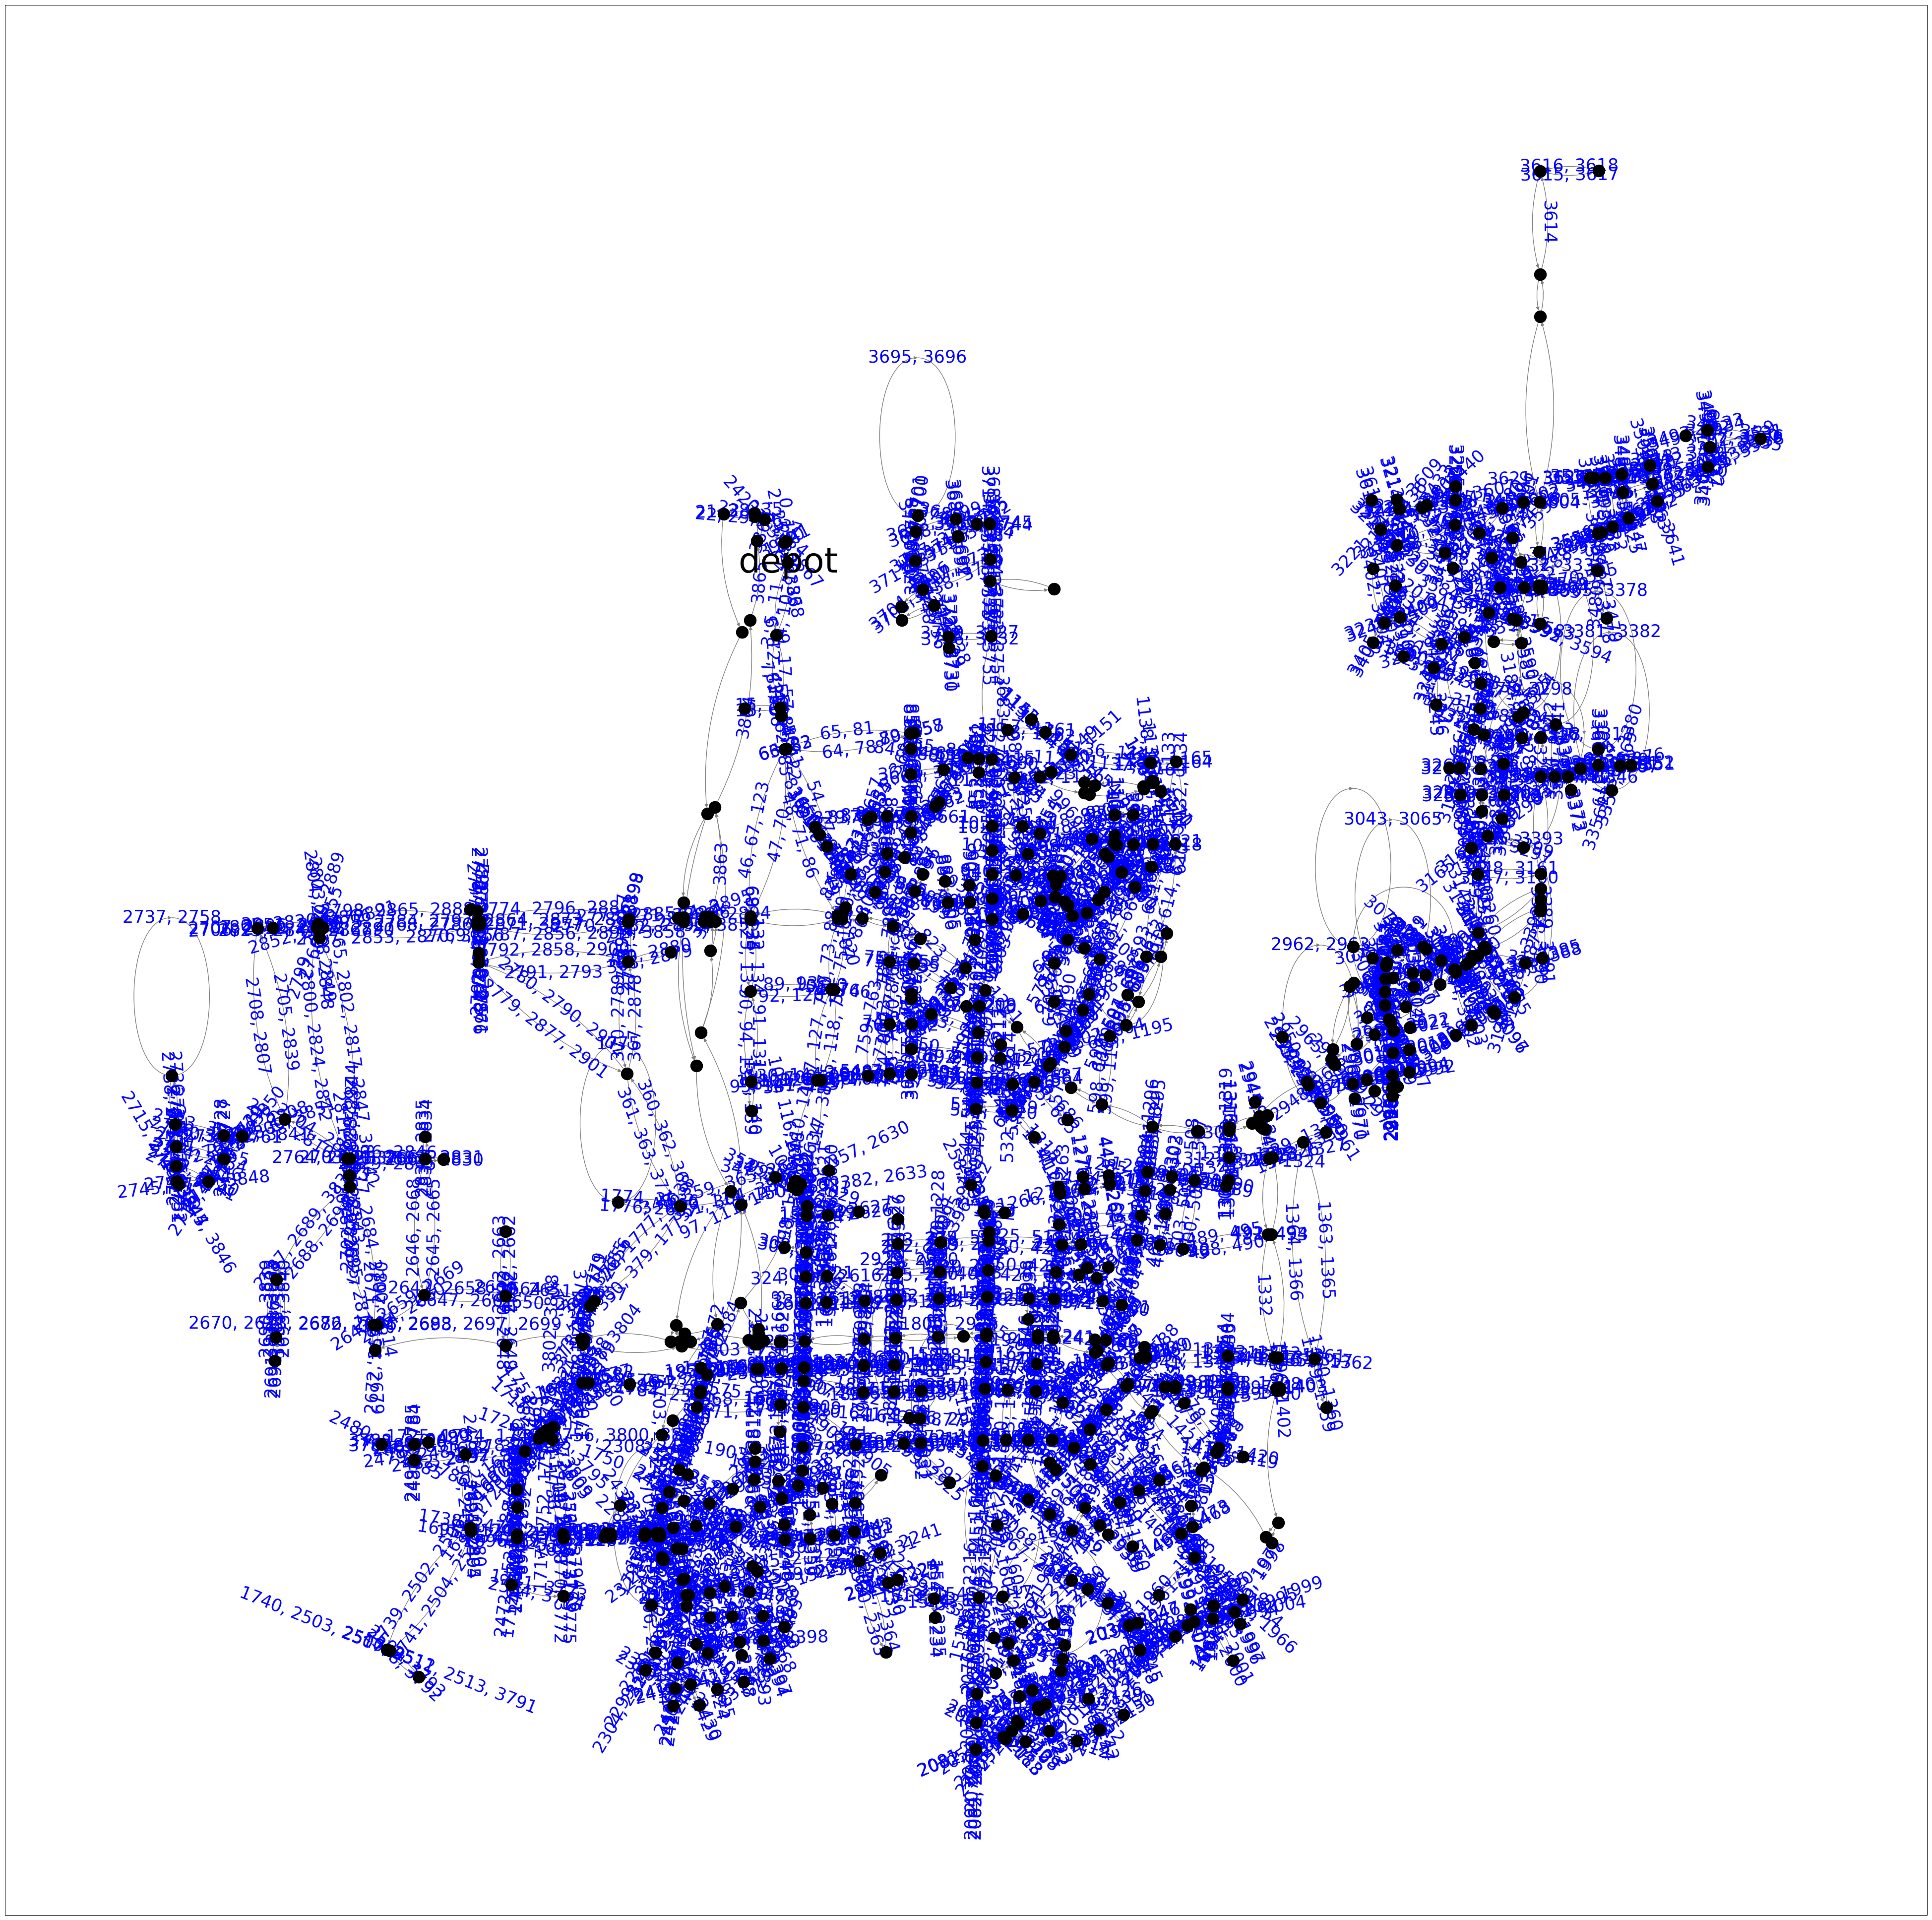

In [88]:
def draw_labeled_multigraph(G, pos, attr_name, ax=None):
    """
    Length of connectionstyle must be at least that of a maximum number of edges
    between pair of nodes. This number is maximum one-sided connections
    for directed graph and maximum total connections for undirected graph.
    """
    # Works with arc3 and angle3 connectionstyles
    connectionstyle = [f"arc3,rad={r}" for r in it.accumulate([0.15] * 4)]
    # connectionstyle = [f"angle3,angleA={r}" for r in it.accumulate([30] * 4)]

    node_lables = dict([(node, "") if node != DEPOT else (node, "depot") for node in G.nodes()]) # label the depot

    plt.figure(figsize=(50, 50))
    nx.draw_networkx_nodes(G, pos, ax=ax, node_color="black")
    nx.draw_networkx_labels(G, pos, font_size=50, ax=ax, labels=node_lables)
    nx.draw_networkx_edges(
        G, pos, edge_color="grey", connectionstyle=connectionstyle, ax=ax
    )

    labels = {
        tuple(edge): f"{attrs[attr_name]}"
        for *edge, attrs in G.edges(keys=True, data=True)
    }
    nx.draw_networkx_edge_labels(
        G,
        pos,
        labels,
        connectionstyle=connectionstyle,
        label_pos=0.5,
        font_color="blue",
        font_size=25,
        bbox={"alpha": 0},
        ax=ax,
    )

def add_order_attribute(G, routes):
    G_graph = G.copy()
    count = 0
    for route in routes:
        for step in route:
            if G_graph[step.node1][step.node2][step.id].get('order') is None:
                G_graph[step.node1][step.node2][step.id]['order'] = str(count)
            else:
                G_graph[step.node1][step.node2][step.id]['order'] += ", " + str(count)
            count += 1
    for edge in G_graph.edges(data=True):
        if edge[2].get('order') is None:
            edge[2]['order'] = ""
    return G_graph

G_Graph = add_order_attribute(G_strong, routes)
draw_labeled_multigraph(G_Graph, node_positions, 'order')
